In [1]:
import matplotlib.pyplot as plt
import numpy as np
# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

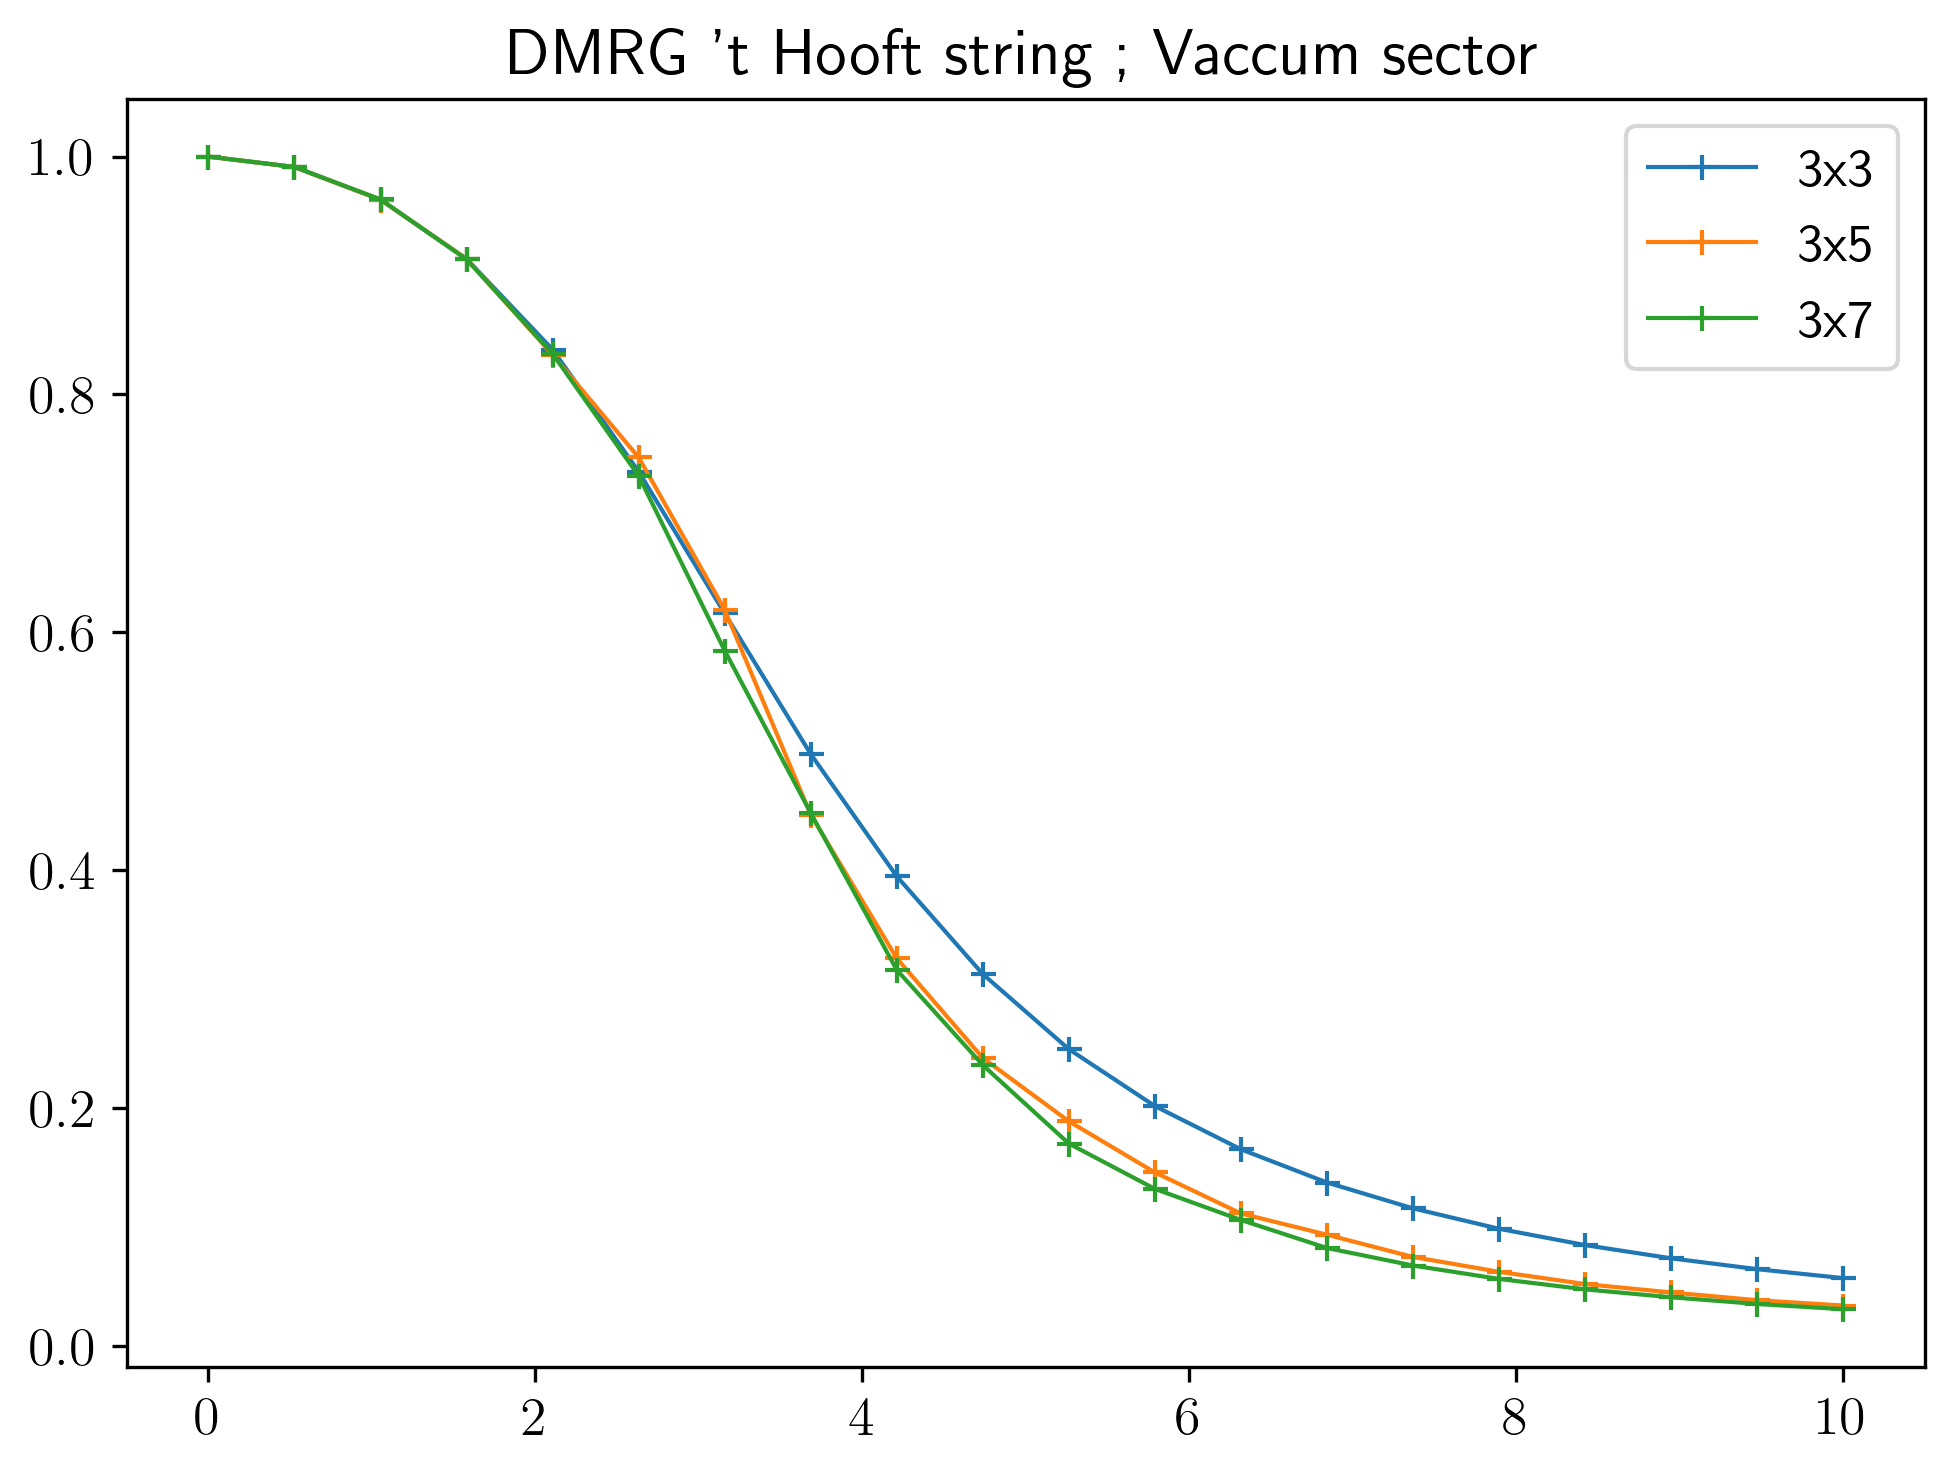

In [2]:
Ls = [3,5,7]
chis = [8,16,32]
ss = [1,2,3]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_3x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"3x{L}")

plt.legend()
plt.show()

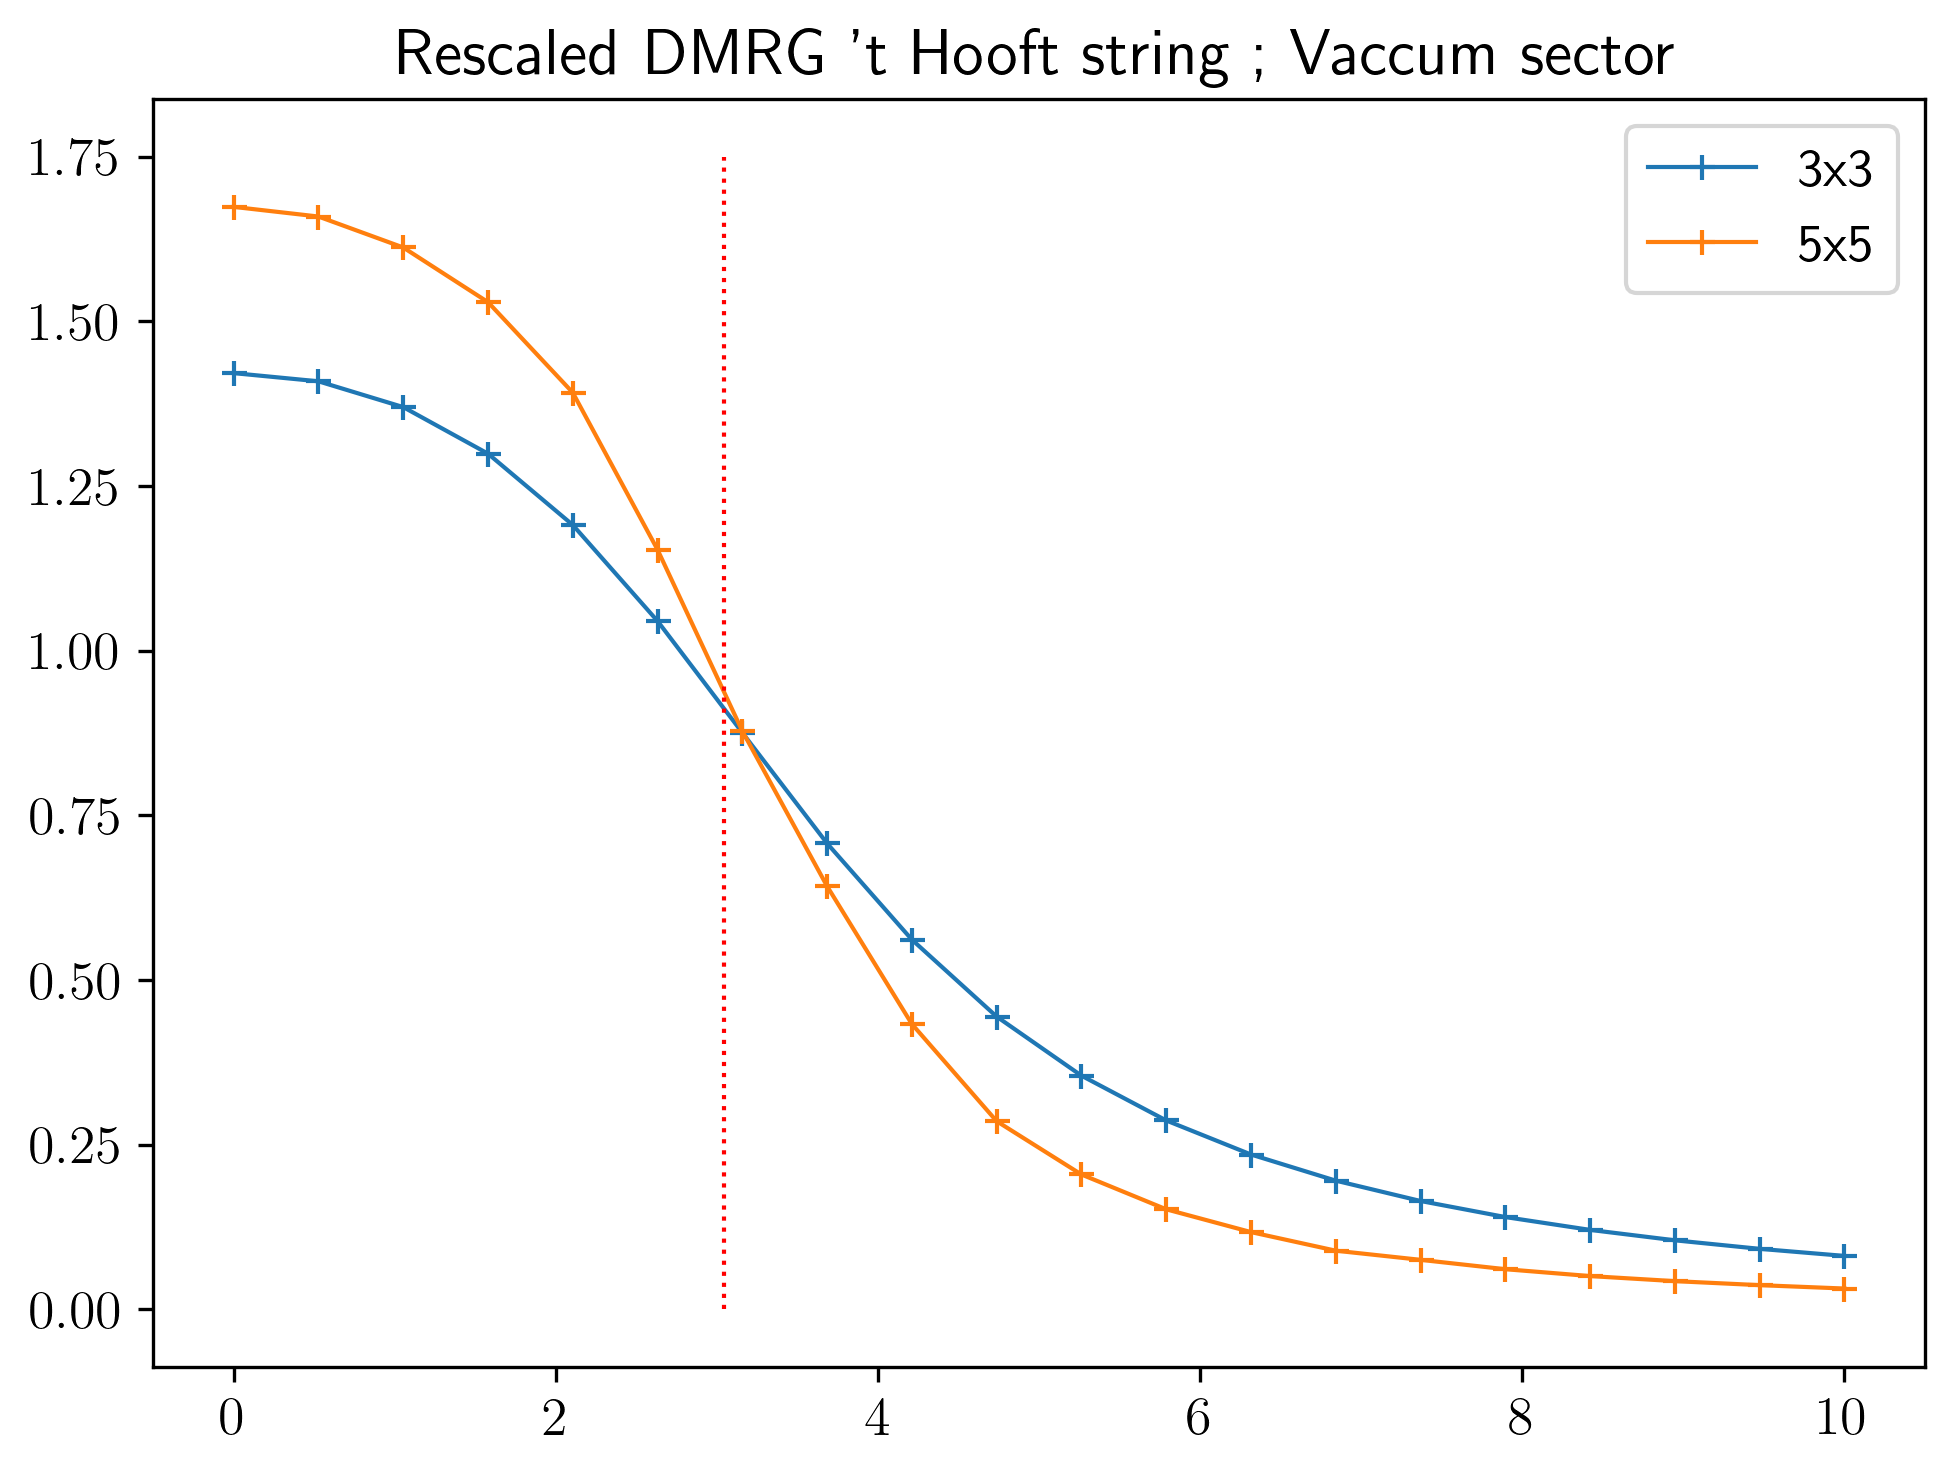

In [15]:
Ls = [3,5]
chis = [8,64]
ss = [1,2]
plt.title("Rescaled DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, (L**(0.32))*string, '+-', linewidth=1, label=f"{L}x{L}")

plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

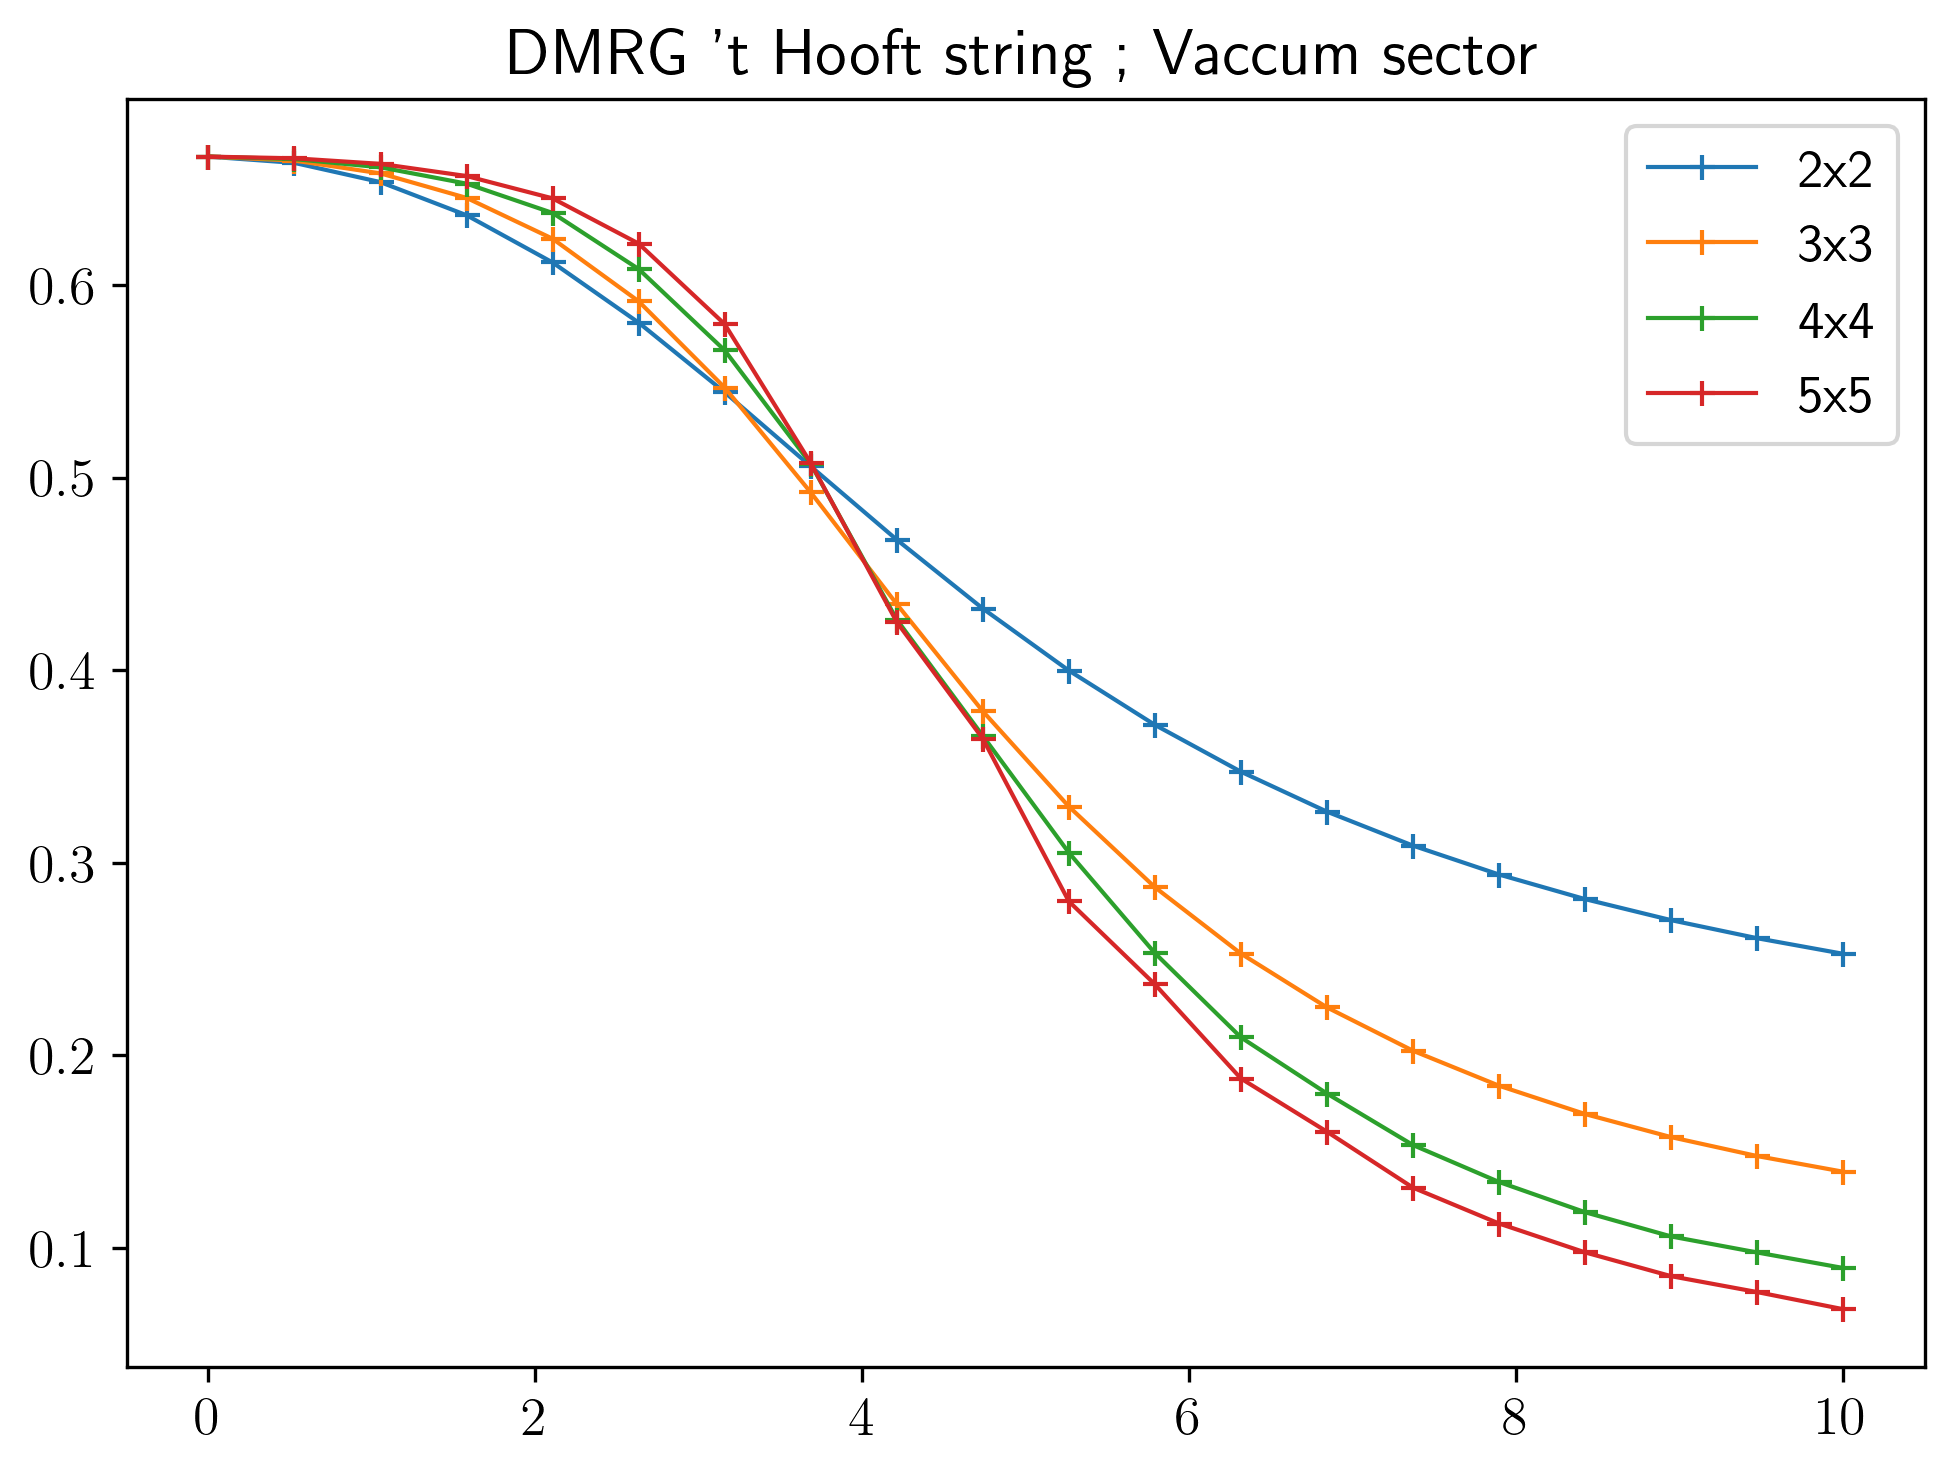

In [57]:
from qs_mps.utils import  binders_cumul
Ls = [2,3,4,5]
chis = [4,8,64,64]
ss = [1,1,1,2]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=1, label=f"{L}x{L}")
    np.save(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy", ub)

plt.legend()
plt.show()

## Extracting the $h_c$ from the Binder's Cumulant

* Fit $U_c(L,h)$ for an interval of $h\text{s}$ which includes the crossing of the curves
* Find and approximate $h_c$ where the curves cross
* Get a more precise value by using the fit functions found and the theoretical value $h_{th}$

In [54]:
# in the case above we select h between 2 and 6
hs_new = hs[4:13]

In [58]:
ub1 = np.load(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_1-1_horizontal_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_64.npy")
ub2 = np.load(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_2-1_horizontal_Z2_dual_direct_lattice_5x5_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_64.npy")
ub1_new = ub1[4:13]
ub2_new = ub2[4:13]
for idx, h in enumerate(hs_new):
    if ub2_new[idx] > ub1_new[idx]:
        print("h critical not found")
    else:
        hc_plus = h
        hc_minus = hs_new[idx-1]
        print(f"h- : {hc_minus}")
        print(f"h+ : {hc_plus}")
        break

h critical not found
h critical not found
h critical not found
h critical not found
h- : 3.6842105263157894
h+ : 4.2105263157894735


In [59]:
# fit the binders cumulant
max_reps = 100
acc = 1e-10
hc_minus = 3.6842105263157894
hc_plus = 4.2105263157894735
for rep in range(max_reps):
    print(f"Repetition: {rep+1}")
    h_mean = (hc_minus+hc_plus)/2
    ub1_fit = np.interp(h_mean, hs_new, ub1_new)
    ub2_fit = np.interp(h_mean, hs_new, ub2_new)
    if ub2_fit > ub1_fit:
        hc_minus = h_mean
    if ub2_fit < ub1_fit:
        hc_plus = h_mean
    if abs(ub2_fit - ub1_fit) < acc:
        hc_aprox = h_mean
        print(f"h critical found in {rep+1} repetitions with accuracy {acc}! h_c: {h_mean}")
        break
    if rep == (max_reps-1):
        print(f"h critical found for a convergence of binders cumulant of {abs(ub2_fit - ub1_fit):1e}")
        print(f"h_c: {h_mean}")
        hc_aprox = h_mean
     

Repetition: 1
Repetition: 2
Repetition: 3
Repetition: 4
Repetition: 5
Repetition: 6
Repetition: 7
Repetition: 8
Repetition: 9
Repetition: 10
Repetition: 11
Repetition: 12
Repetition: 13
Repetition: 14
Repetition: 15
Repetition: 16
Repetition: 17
Repetition: 18
Repetition: 19
Repetition: 20
Repetition: 21
Repetition: 22
h critical found in 22 repetitions with accuracy 1e-10! h_c: 3.8226292007847835


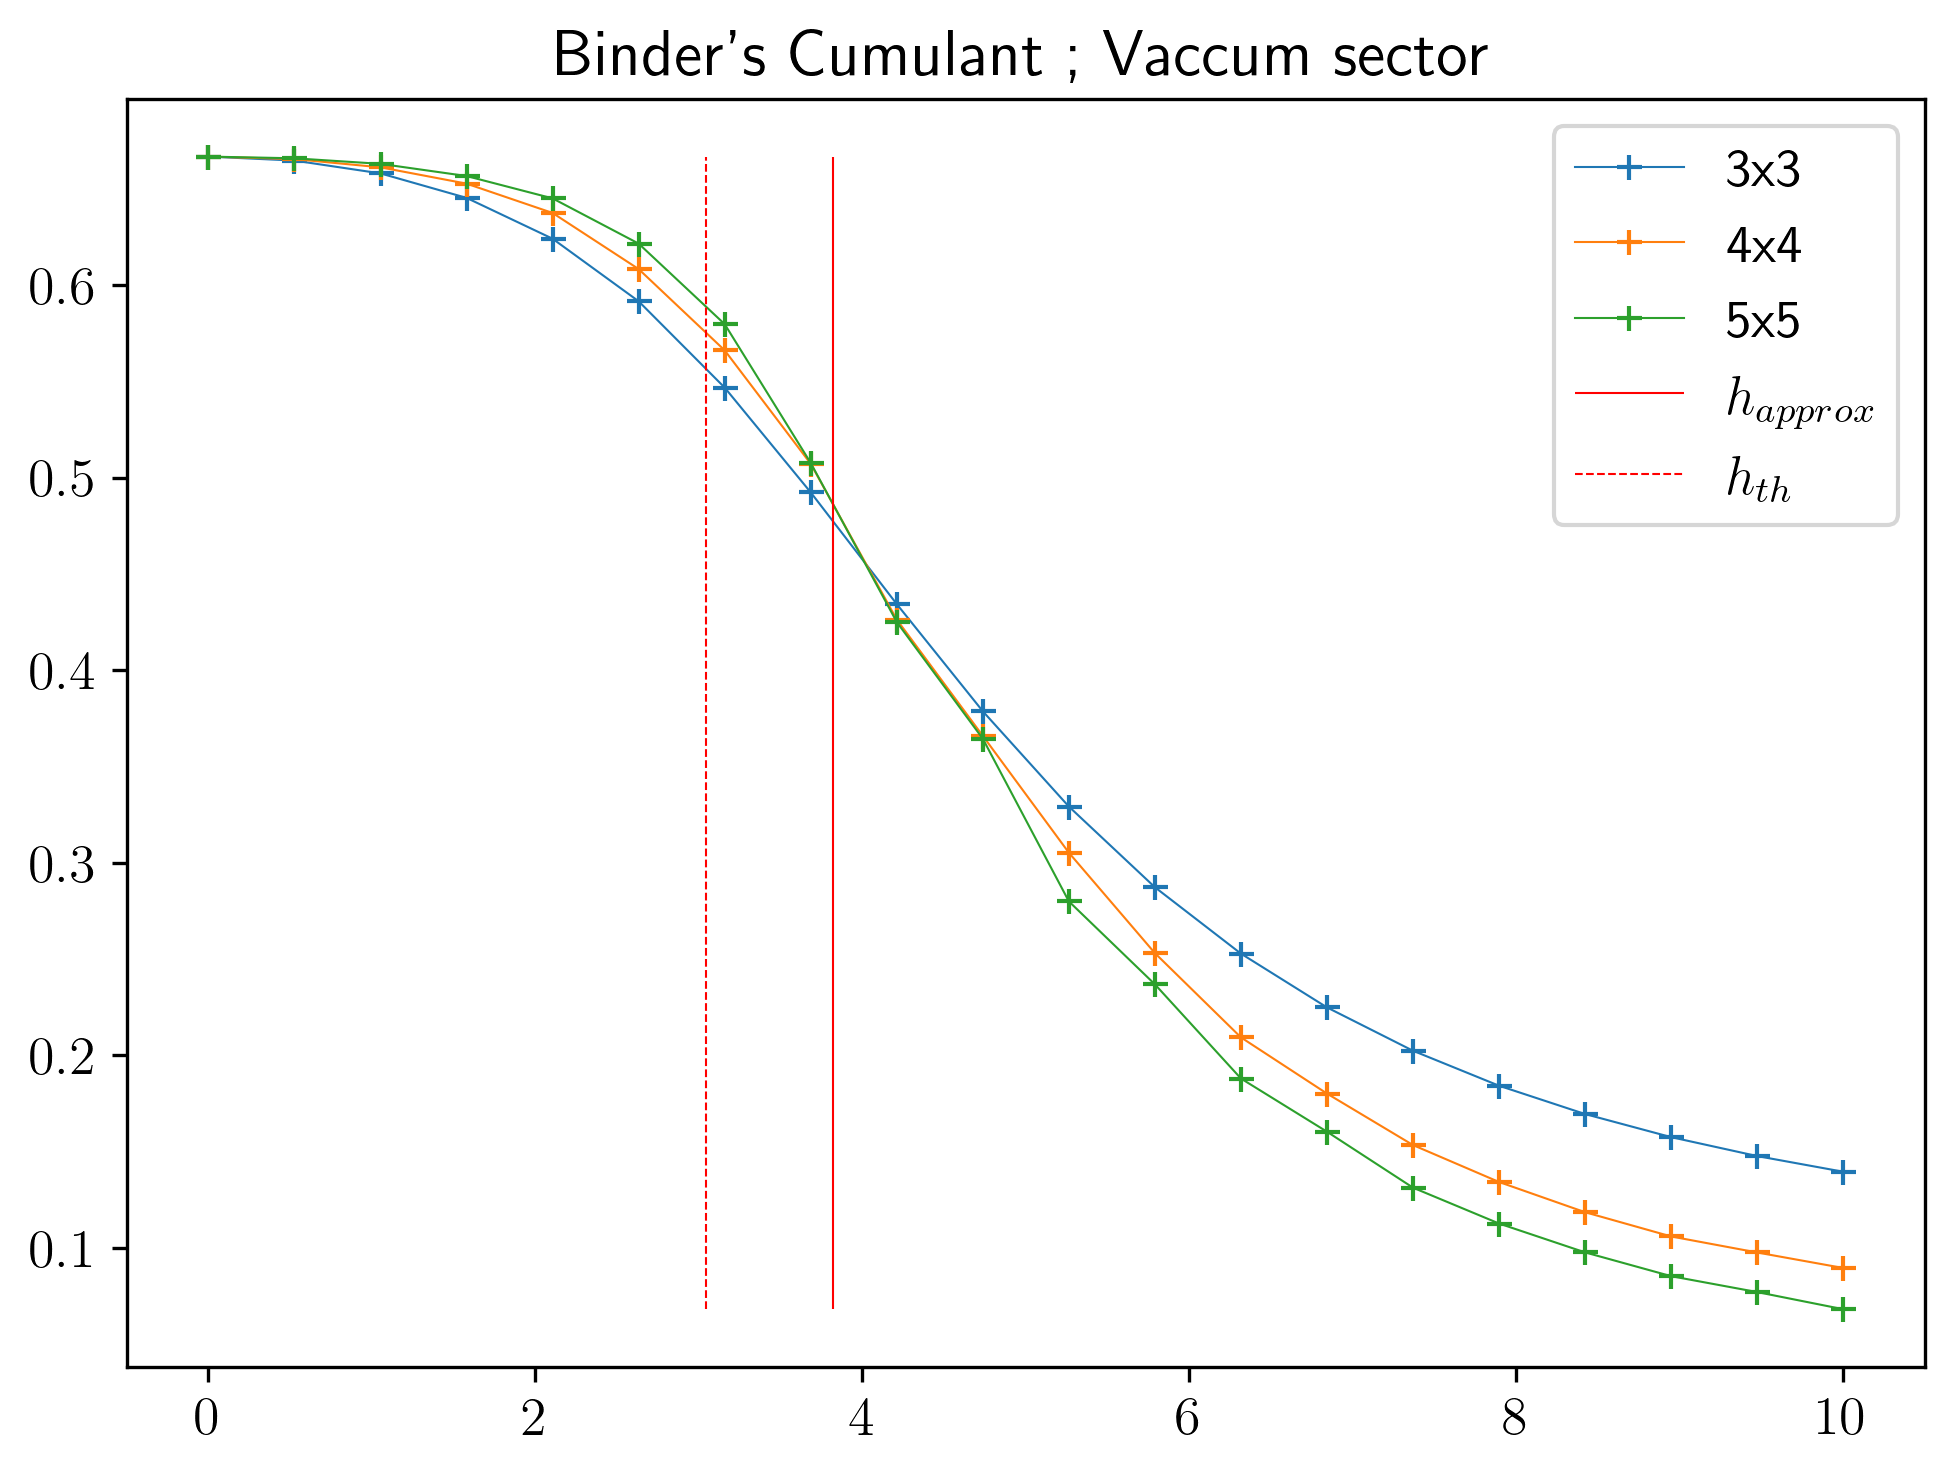

In [67]:
Ls = [3,4,5]
chis = [8,64,64]
ss = [1,1,2]
plt.title("Binder's Cumulant ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=0.5, label=f"{L}x{L}")

hc_th = 3.044
plt.vlines(x=hc_aprox, ymin=min(ub), ymax=max(ub), linewidth=0.5, colors='red', label="$h_{approx}$")
plt.vlines(x=hc_th, ymin=min(ub), ymax=max(ub), linewidth=0.5, linestyles="--", colors='red', label="$h_{th}$")
plt.legend()
plt.savefig(f"G:/My Drive/projects/1_Z2/figures/critical_exponents/binders_cumulant_vacuum_changing_L.png")


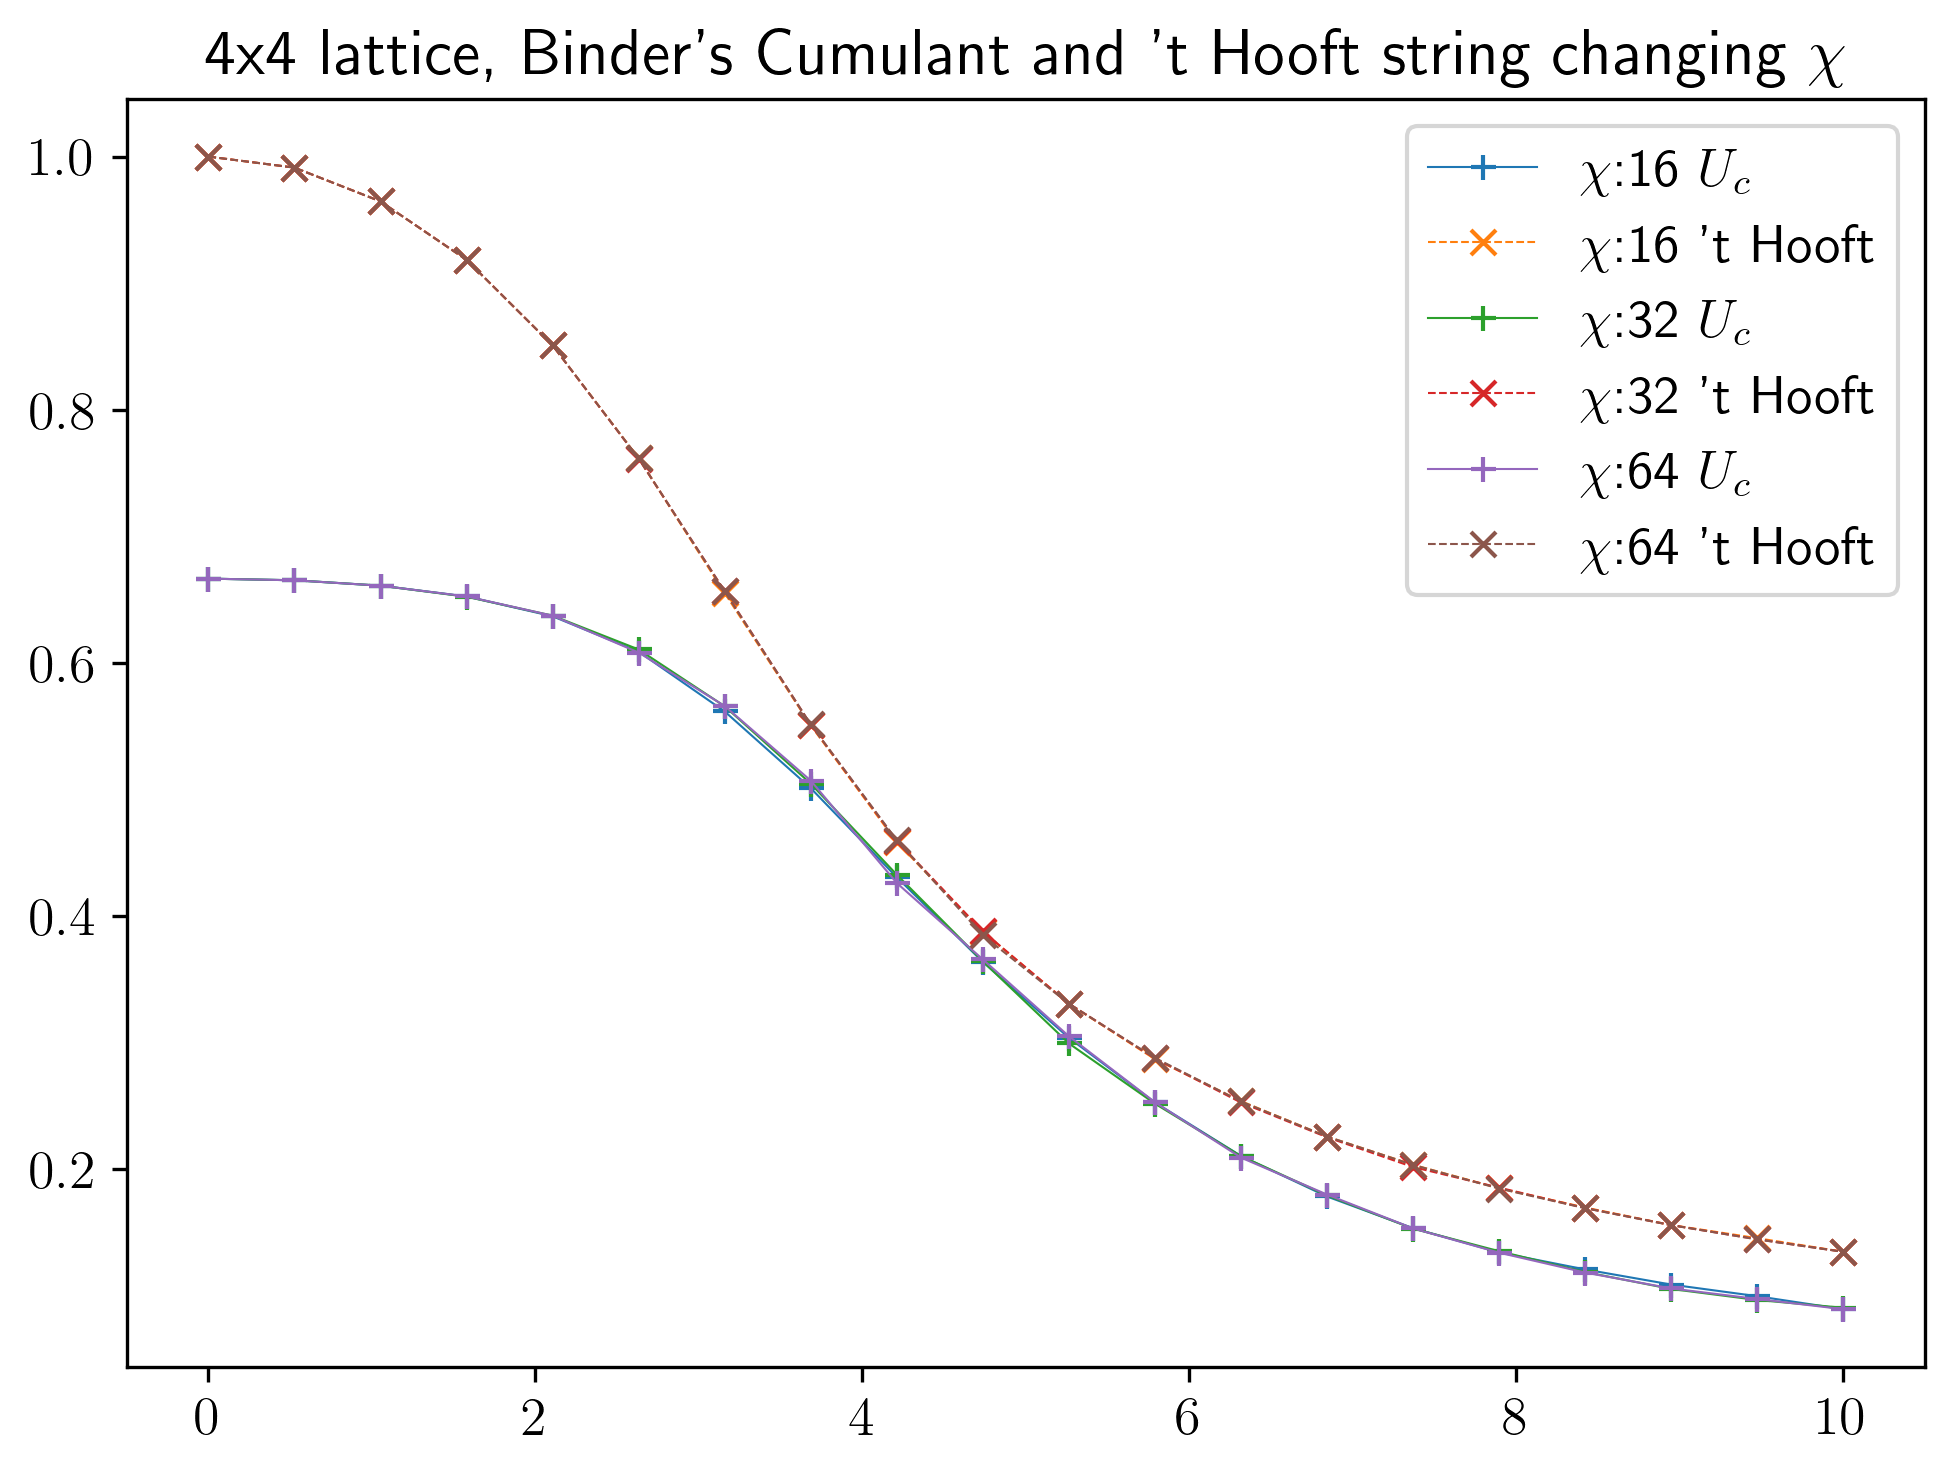

In [64]:
L = 4
s = 1
chis = [16,32,64]
plt.title("4x4 lattice, Binder's Cumulant and 't Hooft string changing $\\chi$") 
for chi in chis:
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_3-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=0.5, label=f"$\\chi$:{chi} $U_c$")
    plt.plot(hs, string, 'x--', linewidth=0.5, label=f"$\\chi$:{chi} 't Hooft")
plt.legend()
plt.savefig(f"G:/My Drive/projects/1_Z2/figures/critical_exponents/binders_cumulant_vs_thooft_string_of_4x4_lattice_vacuum.png")